Looking at FOS data, maybe write a script to turn it into one file if that's reasonable

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [8]:
path = '/media/david/5tb_storage1/eg_uma/hst/fos/'
%ls '/media/david/5tb_storage1/eg_uma/hst/fos/'

y16u0502t_c0f.fits*  y16u0502t_poa.fits*  y16u0503t_c5f.fits*
y16u0502t_c1f.fits*  y16u0502t_shf.fits*  y16u0503t_c7f.fits*
y16u0502t_c2f.fits*  y16u0502t_trl.fits*  y16u0503t_cqf.fits*
y16u0502t_c4f.fits*  y16u0503t_c0f.fits*  y16u0503t_poa.fits*
y16u0502t_c5f.fits*  y16u0503t_c1f.fits*  y16u0503t_shf.fits*
y16u0502t_c7f.fits*  y16u0503t_c2f.fits*  y16u0503t_trl.fits*
y16u0502t_cqf.fits*  y16u0503t_c4f.fits*


In [18]:
calfiles = glob.glob('{}*c*.fits'.format(path))
calfiles

['/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_c0f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_c1f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_c2f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_c4f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_c5f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_c7f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0502t_cqf.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_c0f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_c1f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_c2f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_c4f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_c5f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_c7f.fits',
 '/media/david/5tb_storage1/eg_uma/hst/fos/y16u0503t_cqf.fits']

In [19]:
rootnames = []
for cal in calfiles:
    rootnames.append(fits.getheader(cal, 0)['ROOTNAME'].lower())
rootnames = np.unique(rootnames)
print(rootnames)

['y16u0502t' 'y16u0503t']


In [20]:
fits.getdata(calfiles[0])

array([[-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797],
       [-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797],
       [-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797],
       [-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797]], dtype=float32)

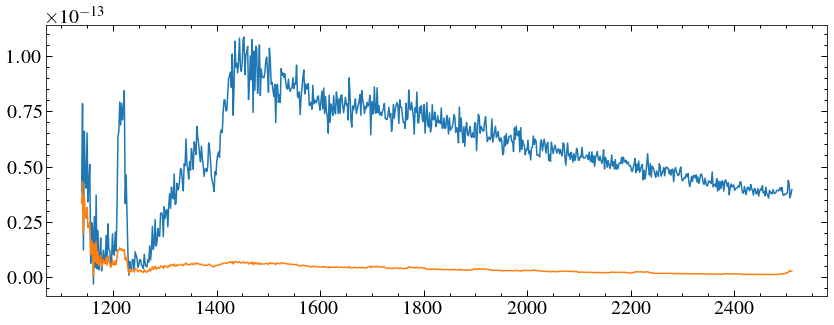

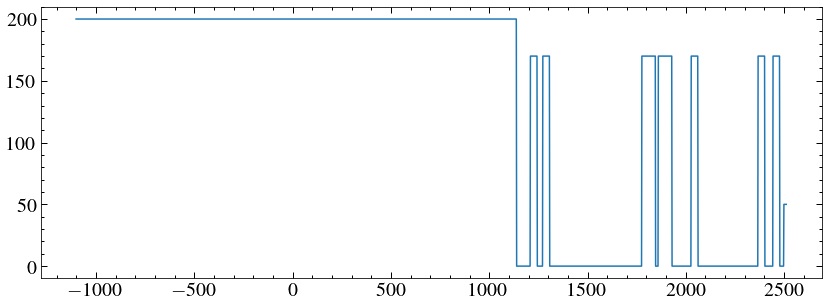

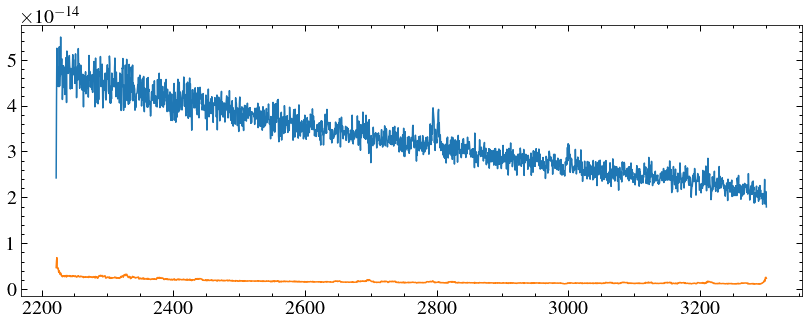

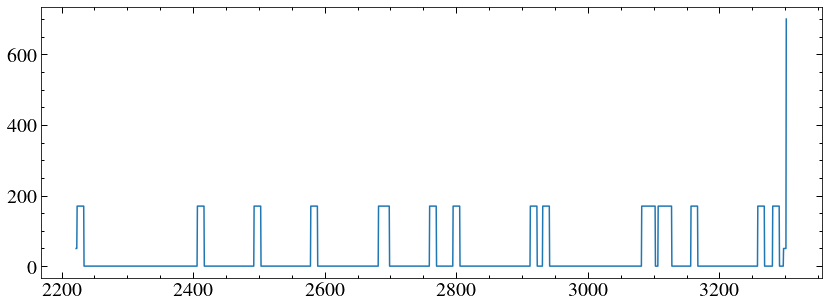

In [35]:
for rootname in rootnames:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    plt.plot(w[q<200],f[q<200])  
    plt.plot(w[q<200],e[q<200])  
    plt.show()
    plt.plot(w, q)
    plt.show()

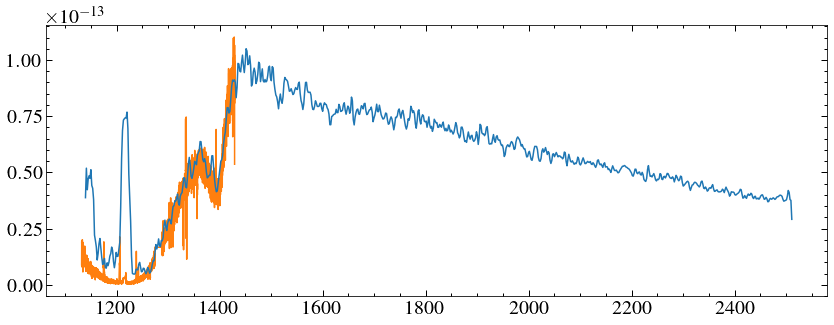

In [44]:
#compare with cos?

smooth =2
for rootname in rootnames[0:1]:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    f = convolve(f,Box1DKernel(smooth))
    e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
    plt.plot(w[q<200],f[q<200])  

cpath = '/media/david/5tb_storage1/eg_uma/hst/cos/'
x = glob.glob('{}*x1dsum.fits'.format(cpath))[0]

smooth=5
data = fits.getdata(x, 1)
w = np.array([], dtype=float)
f = np.array([], dtype=float)
e = np.array([], dtype=float)
for dt in data[::-1]:
    wi, fi, ei, dq = dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
    mask = (fi>0) & (dq == 0) & (wi < 1213) | (wi > 1217) & (fi>0) & (dq == 0) 
   # mask = (dq==0)
    wi, fi, ei = wi[mask], fi[mask], ei[mask]
    w = np.concatenate((w, wi))
    f = np.concatenate((f, fi))
    e = np.concatenate((e, ei)) 

f = convolve(f,Box1DKernel(smooth))
e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
plt.plot(w,f, zorder=-1)
   